# Desicion Trees and Random Forest with the iris dataset

This notebook aims to apply the Desicion Trees and Random Forest classification models. The iris dataset will be used to construct two and three classes classification models based on these features:

- Two features (Sepal_Length, Sepal_Width)

- Two features (Pepal_Length, Pepal_Width)

- Four features (Sepal_Length, Sepal_Width, Petal_Length, Petal_Width)


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris


## Importing libraries

In [3]:
# Import the packages that we will be using
import numpy as np                  # For array
import matplotlib.pyplot as plt     # For showing plots
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

## Importing data

In [4]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
url = "datasets/iris/iris.csv"

# Load the dataset from HHDD
df  = pd.read_csv(url, header = None, names = colnames )

df


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Encoding the class label and remove one of the classes

Encoding the class label and remove one of the classes


In [5]:
# Encoding the class label categorical column: from string to num
df = df.replace({"Flower":  {"Iris-setosa":1, "Iris-versicolor":2, "Iris-virginica":3} })

# Visualize the dataset
df


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


Now the label/category is numeric

Remove all aobservation from one of the classes

In [6]:
# Discard observation for one of the classes, e.g., class "setosa": to have only two classes in our dataset
#Label2Remove = 3 # (1,2,3)
#df = df[df.Flower!=Label2Remove]
#df

# NOTE: comment this if cell if you want to use the three classes


# Desicion Tree step-by-step


# Get dataset of variables **X** and labels **y** to be used with sklearn

Get dataset of variables **X** and labels **y**

In [7]:
# Select variables (one, two, three, four?)
#X  = df[["Sepal_Length", "Sepal_Width"]].values
#X  = df[["Petal_Length", "Petal_Width"]].values
X  = df[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values

# Get the class of each observation
y  = df["Flower"].values


# Desicion Three and Random Forest using sklearn


Desicion Three and Random Forest using sklearn

In [8]:
# Import library
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Create models
clf_DesTre    = DecisionTreeClassifier(max_depth = 3)
clf_RanFor    = RandomForestClassifier(n_estimators = 20)

# Fit the model for the training data
clf_DesTre.fit(X, y )
clf_RanFor.fit(X, y )

# New observation to classify
#xnew = [3.9, 3.1]
xnew = [6, 2.8, 4.9, 1.5]

# Make the predictions using the test set
ypred_DesTre  = clf_DesTre.predict([xnew])
ypred_RanFor  = clf_RanFor.predict([xnew])


In [9]:
print("For the input data: ")
print(xnew)

print("Desicion Tree predicted class is:")
print(ypred_DesTre)

print("Random Forest predicted class is:")
print(ypred_RanFor)


For the input data: 
[6, 2.8, 4.9, 1.5]
Desicion Tree predicted class is:
[2]
Random Forest predicted class is:
[2]


Explore and plot the Desicion Three

[Text(125.55000000000001, 190.26, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(41.85, 27.180000000000007, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(209.25, 27.180000000000007, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

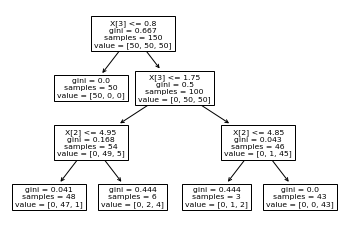

In [10]:
# Import lybrary
from sklearn import tree

# Plot the Desicion Tree model
tree.plot_tree(clf_DesTre)


# Evaluation of the Desicion Tree and a Random Forest models


## Holdout

Holdout: spliting the dataset in train and test sets once

In [11]:
# Import sklearn funtions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Split data in train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.30) # , random_state = 0

# Create models
clf_LogReg    = LogisticRegression(C=1e5)
clf_DesTre    = DecisionTreeClassifier(max_depth = 3)
clf_RanFor    = RandomForestClassifier(n_estimators = 20)


# Fit the model for the training data
clf_LogReg.fit(Xtrain,ytrain)
clf_DesTre.fit(Xtrain,ytrain)
clf_RanFor.fit(Xtrain,ytrain)

# Make the predictions using the test set
ypred_LogReg  = clf_LogReg.predict(Xtest)
ypred_DesTre  = clf_DesTre.predict(Xtest)
ypred_RanFor  = clf_RanFor.predict(Xtest)



Accuracy Logistic Regression:  93.33 %
Accuracy Desicion Tree:        93.33 %
Accuracy Random Forest:        93.33 %


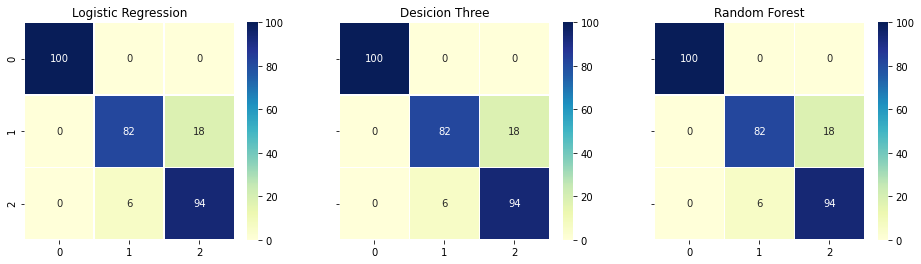

In [12]:
# Calculate tota accuracy
acc_LogReg    = 100*accuracy_score(ytest, ypred_LogReg)
acc_DesTre    = 100*accuracy_score(ytest, ypred_DesTre)
acc_RanFor    = 100*accuracy_score(ytest, ypred_RanFor)
print("Accuracy Logistic Regression:  {:.2f} %".format(acc_LogReg) )
print("Accuracy Desicion Tree:        {:.2f} %".format(acc_DesTre) )
print("Accuracy Random Forest:        {:.2f} %".format(acc_RanFor) )


# Calculate confusion matrix
CM_LogReg     = np.round(100*confusion_matrix(ytest, ypred_LogReg, normalize = 'true'))
CM_DesTre     = np.round(100*confusion_matrix(ytest, ypred_DesTre, normalize = 'true'))
CM_RanFor     = np.round(100*confusion_matrix(ytest, ypred_RanFor, normalize = 'true'))


# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(16, 4), sharey=True)

sns.heatmap(CM_LogReg, annot=True, fmt='g', ax=axes[0], cmap="YlGnBu", linewidths=.5, vmin=0, vmax=100, center=50 )
axes[0].set_title('Logistic Regression'); 

sns.heatmap(CM_DesTre, annot=True, fmt='g', ax=axes[1], cmap="YlGnBu", linewidths=.5, vmin=0, vmax=100, center=50 )
axes[1].set_title('Desicion Three'); 

sns.heatmap(CM_RanFor, annot=True, fmt='g', ax=axes[2], cmap="YlGnBu", linewidths=.5, vmin=0, vmax=100, center=50 )
axes[2].set_title('Random Forest'); 

plt.show()

# Recall that:
# {"Flower":  {"Iris-setosa":1, "Iris-versicolor":2, "Iris-virginica":3} }


## Repeated k-fold

Check the acurracy of the model using repeated k-fold cross-validation

# Final remarks

- Decision Trees represent a tool based on a tree-like graph of decisions and their possible outcomes
- Decision Tree learning is a machine learning method that employs a decision tree as a predictive model
- Scikit-learn uses an optimized version of the CART algorithm (but it does not support numerical variables): categorical attributes need to be encoded, see LabelEncoder and OneHotEncoder
- Random Forest builds many slightly different Desicion Trees and combine their predictions


# Activity



1- 
